# Tarea 3 de Redes Complejas
## Nombres: Angela Martínez/ Ignacio Delgadillo

### Pregunta 1

In [2]:
import pandas as pd
import networkx as nw
import graphviz as gr
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [4]:
#se crean 4 listas que seran de referencia para la gestión de las comunidades de nodos
nodos= list(range(200))
B_1 = nodos[0:100]
B_2 = nodos[100:200]
C_1 = nodos[0:50]+nodos[100:150]
C_2 = nodos[50:100]+nodos[150:200]

#se crea un grafo erdos renyi con p=0.2 no dirigido
e_r = nw.erdos_renyi_graph(200, 0.2, seed=None, directed=False) 



In [6]:
B_1_B_2 = [] #una lista con los 11 medidas de modularidad de cada grafo que se crearan con los grupos B1 y B2
#para los grupos B_1 y B_2
for i in range (11):
    D_e_r = nw.DiGraph() # se crea un grafo dirigido con los mismos nodos que el anterior, tomar en cuenta que no es un modelo ER pero es una copia modificada del grafo anterior.
    D_e_r.add_nodes_from(list(e_r.nodes))
    p = i/10 #la medida de probabilidad par acada iteracion entre comunidades contrarias
    for j in range (len(list(e_r.edges))):
      # aca se recorre arista por arista preguntando si estan entre comunidad o diferentes para aplicar la probabilidad correspondiente
      if ((list(e_r.edges)[j][0]<100)&(list(e_r.edges)[j][1]<100))|((list(e_r.edges)[j][0]>100)&(list(e_r.edges)[j][1]>100)):
        # se aplica la probabilidad 0.5 a los del mismo grupo
        if (np.random.choice([True,False], 1)):
          D_e_r.add_edge(list(e_r.edges)[j][0],list(e_r.edges)[j][1])
        else:
          D_e_r.add_edge(list(e_r.edges)[j][1],list(e_r.edges)[j][0])
      else:
        #se aplica probabilidad dinamicoa a los de distinta comunidad
        if (np.random.choice([True,False], 1, p=[p,1-p])):
          D_e_r.add_edge(list(e_r.edges)[j][0],list(e_r.edges)[j][1])
        else:
          D_e_r.add_edge(list(e_r.edges)[j][1],list(e_r.edges)[j][0])
    # se guarda en una matriz los valores de modularidad y cada experimento
    B_1_B_2.append(nw.algorithms.community.modularity(D_e_r, [B_1, B_2]))
    D_e_r.clear()

C_1_C_2 = [] #una lista con los 11 medidas de modularidad de cada grafo que se crearan con los grupos B1 y B2
#para los grupos C_1 y C_2
for k in range (11):
    D_e_r = nw.DiGraph() 
    D_e_r.add_nodes_from(list(e_r.nodes))
    p = k/10
    for l in range (len(list(e_r.edges))):
      if ((list(e_r.edges)[l][0]<50)&((list(e_r.edges)[l][1]<50)|(100<list(e_r.edges)[l][1]<150)))|((100<list(e_r.edges)[l][0]<150)&((list(e_r.edges)[l][1]<50)|(100<list(e_r.edges)[l][1]<150)))|((50<list(e_r.edges)[l][0]<100)&((100<list(e_r.edges)[l][1]<100)|(150<list(e_r.edges)[l][1])))|((150<list(e_r.edges)[l][0])&((50<list(e_r.edges)[l][1]<100)|(150<list(e_r.edges)[l][1]))):
        if (np.random.choice([True,False], 1, p=[1,0])):
          D_e_r.add_edge(list(e_r.edges)[l][0],list(e_r.edges)[l][1])
        else:
          D_e_r.add_edge(list(e_r.edges)[l][1],list(e_r.edges)[l][0])
      else:
        if (np.random.choice([True,False], 1, p=[p,1-p])):
          D_e_r.add_edge(list(e_r.edges)[l][0],list(e_r.edges)[l][1])
        else:
          D_e_r.add_edge(list(e_r.edges)[l][1],list(e_r.edges)[l][0])
    C_1_C_2.append(nw.algorithms.community.modularity(D_e_r, [C_1, C_2]))
    D_e_r.clear()



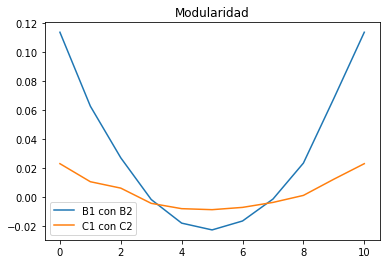

In [7]:
# se graficarán los datos obtenidos delexperimentos realizados
plt.plot(B_1_B_2, label='B1 con B2')
plt.plot(C_1_C_2, label='C1 con C2')
plt.title("Modularidad")
plt.legend()
plt.show()